In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score

In [122]:
# Generates the Clusters 
def generate_clusters(data, means):
    clusters = [[] for _ in range(means.shape[1])] #generating list of clusters 
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - means.T, axis=1) 
        cluster_index = np.argmin(distances) #cluster_index is the minimum distance cluster, assigned to the ith gene
        clusters[cluster_index].append(i) #ith gene added to the cluster with index cluster_index
    return clusters

# Updates the clusters and determines if convergence has or has not reached convergence
def update_clusters(data, clusters, means):
    converged = True #setting a converge variable to check whether the means change after updating
    for i in range(len(clusters)):
        cluster = clusters[i]
        if len(cluster) == 0: #checking if the cluster is empty
            continue
        new_mean = np.mean(data[cluster], axis=0) #new centroid is the means of data points of old cluster
        if not np.array_equal(new_mean, means[:, i]): #if means change, the algorithm has not converged
            converged = False
        means[:, i] = new_mean
    return converged, means

def k_means(data,means, k, max_iterations):
    iterations = 0
    obj_values = []
    while iterations < max_iterations: #continue clustering until max iterations reached
        clusters = generate_clusters(data, means)
        obj_value = 0 
        for i in range(len(clusters)): #ranging over the clusters
            cluster = clusters[i]
            for j in range(len(cluster)): #ranging over the number of elements in ith cluster
                data_point = data[cluster[j]] #retrieving the (cluster[j])th element in data
                distance = np.square(euclidean_distance(data_point, means[:, i])) #calculating distance of gene from centroid
                obj_value += distance  
        obj_values.append(obj_value)
        converged, means = update_clusters(data, clusters, means) 
        if len(clusters[0]) == data.shape[0] or converged: #if algorithm has converged or all elements in one cluster
            break
        iterations += 1
    return clusters, means, obj_values

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


def random_clusters(data,k):
    means_random = np.random.randint(1,data.shape[0]+1,size=k)
    means_array=np.zeros((data.shape[1],k))
    for i in range(len(means_random)):
        means_array[:,i]=data[means_random[i],:]
    clusters, means, obj_values = k_means(data, means_array, k, 50)
    return clusters, means, obj_values

In [123]:
#load and process data here
data_pd = pd.read_csv("filtered_data_BAL.csv").iloc[:,1:]
data = data_pd.to_numpy()
data.shape

(2306, 154)

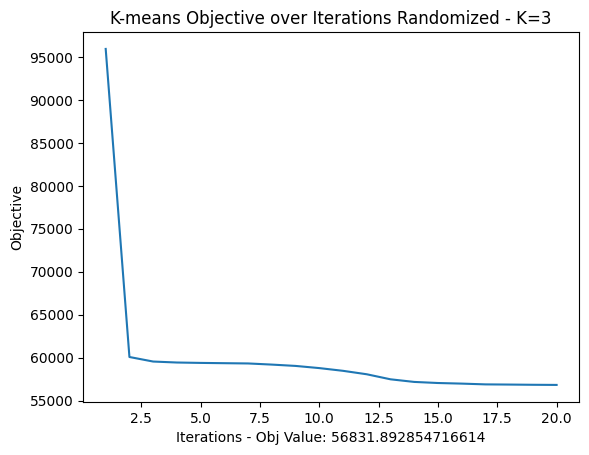

In [127]:
clusters,means,obj_values=random_clusters(data.T,3)
min_obj=obj_values[-1]
plt.plot(range(1, len(obj_values)+1), obj_values)
plt.title('K-means Objective over Iterations Randomized - K=3')
plt.xlabel('Iterations - Obj Value: {x}'.format(x=min_obj))
plt.ylabel('Objective')
plt.savefig("k-means3.png")
plt.show()

In [128]:
labels = np.concatenate([np.full(len(sublist), i, dtype=int) for i, sublist in enumerate(clusters)])
ch_score = calinski_harabasz_score(data.T, labels)
print(ch_score)

4.058974418015041


In [129]:
print(len(clusters[0]))

43


In [131]:
# raw = np.corrcoef(data.T, rowvar=False)
# plt.imshow(raw)
# plt.colorbar()
# plt.title('Correlation Coefficient Matrix of Raw Data')
# plt.savefig("CCMatrix.png")
# plt.show()

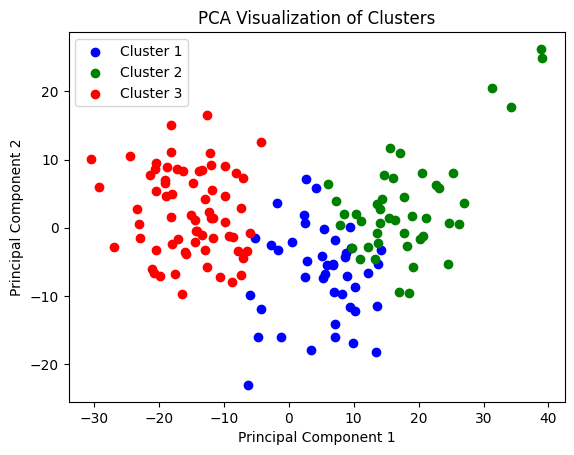

In [132]:
def visualize_clusters_pca(data, clusters):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data.T)
    
    # Plot each cluster with a different color
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, cluster in enumerate(clusters):
        cluster_data = pca_data[cluster]
        plt.scatter(cluster_data[:,0], cluster_data[:,1], c=colors[i % len(colors)], label='Cluster {}'.format(i+1))
    
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization of Clusters')
    plt.show()

visualize_clusters_pca(data, clusters)

In [133]:
# def heatmap(clusters,data,minimum):
    
#     grouped_data = []
#     for i in range(len(clusters)):
#         cluster_data = np.zeros((data.shape[1], len(clusters[i])))
#         for j in range(len(clusters[i])):
#             cluster_data[:, j] = data.T[:, clusters[i][j]]
#         grouped_data.append(cluster_data)

#     grouped_data = np.concatenate(grouped_data, axis=1)

        
#     grouped = np.corrcoef(grouped_data)
#     title="CC Matrix of Grouped, Objective Function:"+str(minimum)
#     plt.imshow(grouped)
#     plt.colorbar()
#     plt.title(title, fontsize=5.9)
#     plt.show

# heatmap(clusters, data, min(obj_values))

In [134]:
#BEC Clustering

data_bec_pd = pd.read_csv("filtered_bec.csv").iloc[:,1:-1]
data_bec = data_bec_pd.to_numpy()
data_bec.shape


(3000, 155)

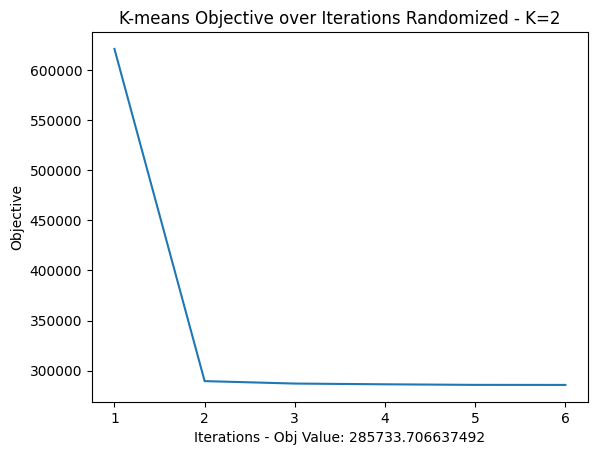

In [149]:
clusters_bec,means_bec,obj_values_bec=random_clusters(data_bec.T,2)
min_obj=obj_values_bec[-1]
plt.plot(range(1, len(obj_values_bec)+1), obj_values_bec)
plt.title('K-means Objective over Iterations Randomized - K=2')
plt.xlabel('Iterations - Obj Value: {x}'.format(x=min_obj))
plt.ylabel('Objective')
plt.savefig("k-means3.png")
plt.show()

5.961594411776096


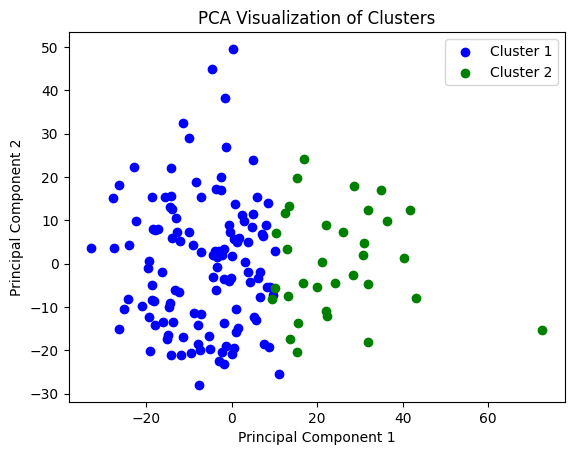

In [150]:
labels_bec = np.concatenate([np.full(len(sublist), i, dtype=int) for i, sublist in enumerate(clusters_bec)])
ch_score_bec = calinski_harabasz_score(data_bec.T, labels_bec)
print(ch_score_bec)

visualize_clusters_pca(data_bec, clusters_bec)